# Data Exploration

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import IPython.display as display

In [3]:
!ls /data

alex-lechner-udacity-traffic-light-dataset.zip	udacity-image-stats.txt
jpg_simulator_train.record			udacity_label_map.pbtxt
jpg_udacity_train.record			udacity_testarea_rgb
simulator_dataset_rgb


In [4]:
filenames = ["/data/jpg_simulator_train.record", "/data/jpg_udacity_train.record"]

In [5]:
raw_dataset = tf.data.TFRecordDataset(filenames)

In [6]:
raw_dataset

<TFRecordDataset shapes: (), types: tf.string>

In [7]:
#raw_dataset = raw_dataset.batch(1, drop_remainder=True)
raw_dataset = raw_dataset.take(1)

In [8]:
raw_dataset

<TakeDataset shapes: (), types: tf.string>

In [9]:
iterator = raw_dataset.make_one_shot_iterator()
next_element_op = iterator.get_next()

In [10]:
with tf.Session() as sess:
    element = sess.run([next_element_op])

In [11]:
example = tf.train.Example()
example.ParseFromString(element[0])

42744

In [12]:
example; # Print if you want to see the whole example structure

In [13]:
#print(dict(example.features.feature));

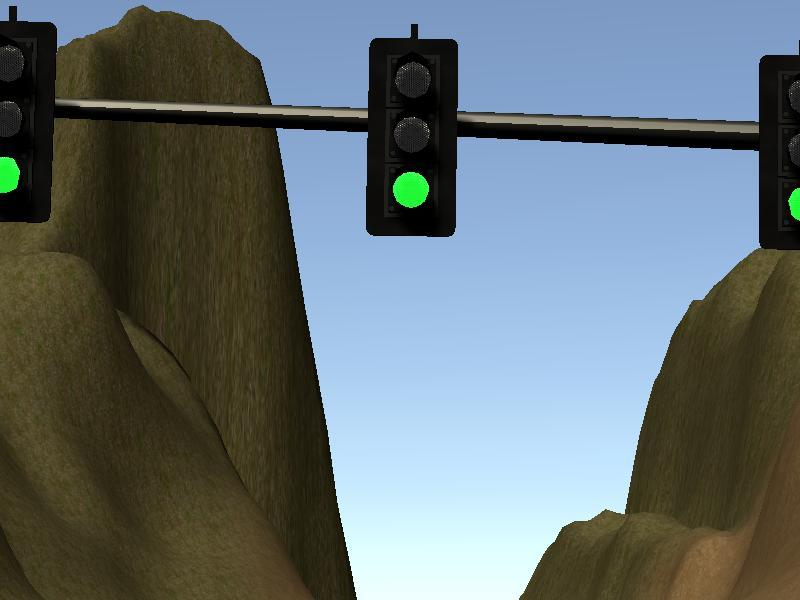

In [14]:
display.display_jpeg(example.features.feature["image/encoded"].bytes_list.value[0], raw=True)

In [15]:
dict(example.features.feature).keys()

dict_keys(['image/object/truncated', 'image/width', 'image/format', 'image/object/class/label', 'image/height', 'image/object/class/text', 'image/object/bbox/ymin', 'image/source_id', 'image/object/view', 'image/encoded', 'image/object/bbox/ymax', 'image/object/bbox/xmin', 'image/filename', 'image/object/bbox/xmax', 'image/object/difficult', 'image/key/sha256'])

In [16]:
udacity_train = tf.data.TFRecordDataset([filenames[1]])

In [17]:
udacity_train = udacity_train.take(1)
oneshot_iterator = udacity_train.make_one_shot_iterator()
get_next_op = oneshot_iterator.get_next()

In [18]:
with tf.Session() as sess:
    entry = sess.run(get_next_op)

In [19]:
example = tf.train.Example()

In [20]:
example.ParseFromString(entry)

396558

In [21]:
dict(example.features.feature).keys()

dict_keys(['image/object/difficult', 'image/key/sha256', 'image/width', 'image/object/truncated', 'image/format', 'image/object/class/label', 'image/height', 'image/object/class/text', 'image/object/bbox/ymin', 'image/object/view', 'image/source_id', 'image/encoded', 'image/object/bbox/ymax', 'image/object/bbox/xmin', 'image/filename', 'image/object/bbox/xmax'])

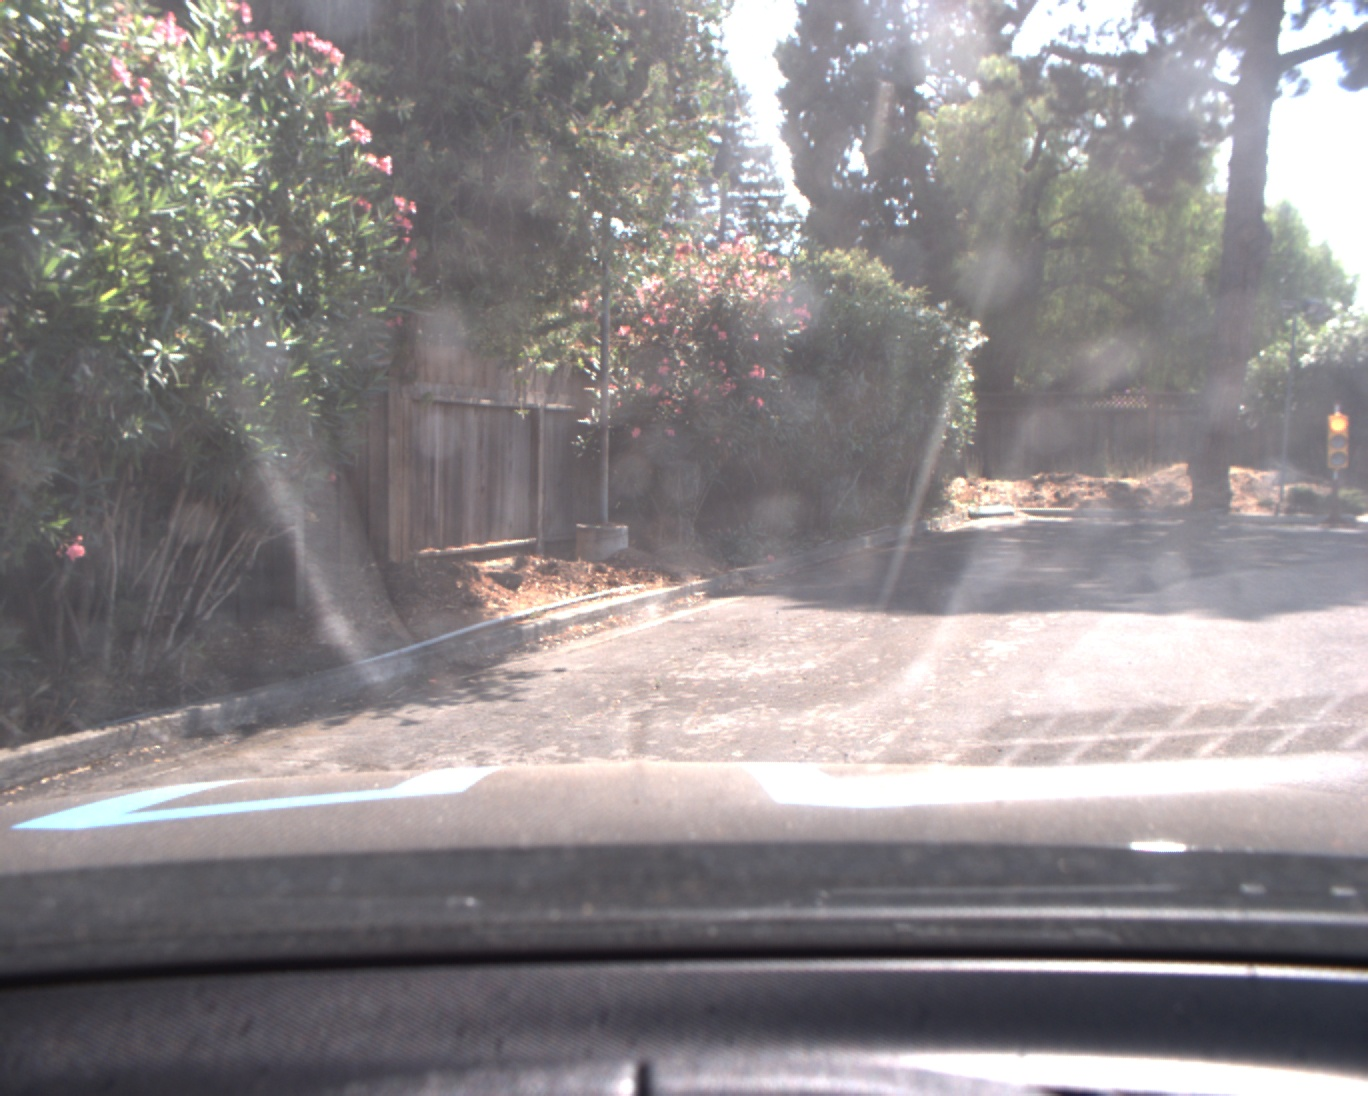

In [22]:
display.display_jpeg(example.features.feature["image/encoded"].bytes_list.value[0], raw=True)